 ### 목표
 - iris 꽃의 특징을 활용해서 품종을 분류하는 모델을 만들어보자
 - knn모델을 사용하고, 하이퍼파라미터를 조정해보자! (하이퍼파라미터 튜닝)

In [3]:
#라이브러리 가져오기 !

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris  # iris 데이터가 모인 라이브러리 (우리 머신러닝 공부 효율적으로 하라고 준비해둔 데이터셋)
# sklean 라이브러리는 우리가 실습할수 있는 데이터들도 제공해줌 


#from sklearn.neighbors import KNeighborsClassifier    -> knn모델

#from sklearn import metrics   # 성능평가

# 일반적으로 classifier가 붙으면 분류




In [5]:
iris_data = load_iris()
#가져온 모듈을 쓸수 있게 생성 --> 자바에 생성자 new ()와 비슷한거임

#### 데이터 살펴보기

In [6]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
iris_data.keys()
# 데이터가 너무기닌까 키값들만 봐보기

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
# 특성데이터 (꽃 정보 측정 데이터)  -> x데이터   (문제)
iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
# 레이블 값(데이터) - 꽃 품정 정보  -> 정답데이터 y   (정답)
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# 클래스 (꽃 품종 이름)
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
# 특성의 이름 (꽃 특징 이름)- 컬럼이름
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
print(iris_data['DESCR'])
# 데이터를 열어보니 \n 개행 표시가있어서 알아보기쉽게 print() 안에 넣어주면됨

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 문제정의 
- iris 꽃을 분류해보자!
- 지도학습 에 분류(classification)

### 데이터 수집
- sklearn의 내장 데이터셋 활용

### 데이터 전처리 단계
- 결측치 확인
- 데이터 단위가 같은지, 어떤 단위를 쓰는지? 확인

In [16]:
# df로 만들기 (dataframe)  -> 데이터로 쓸껄 안에 넣어주기   (전처리하기쉽게 데이터들을 df형태로 먼저 만들어주기)
iris_df = pd.DataFrame(data = iris_data['data'],
            columns = iris_data['feature_names'])

In [17]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
iris_df.info()
# 데이터 150개고 결측치 없다~

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### EDA (탐색적데이터분석)
- 산점도 그래프를 그리자!

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(close=None, block=None)>

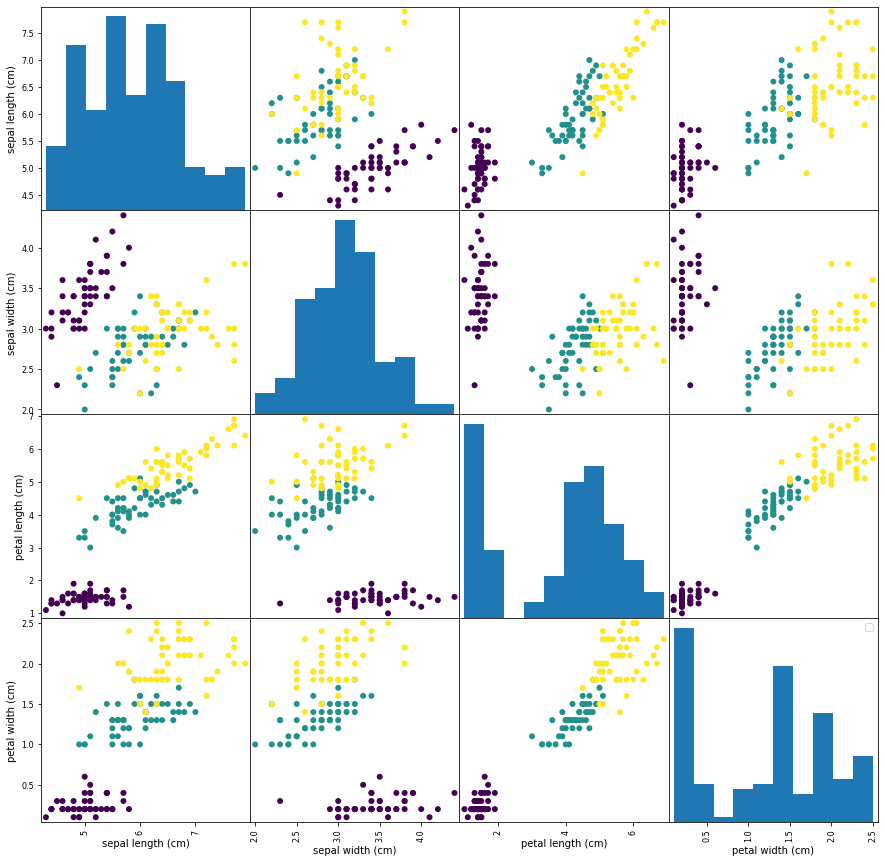

In [24]:
pd.plotting.scatter_matrix(iris_df, # 이 데이터를 가지고 시각화를 할거다
                          figsize=(15,15), # 크기키우기
                          c = iris_data['target'], #타겟 데이터에 색깔주기
                          marker='o', #마커크기 키우기
                          alpha=1) #투명도 (알파가없으면 흐림, 알파 1이면 선명하게)

plt.show
#산점도 행,열을 그려주는


### 모델 선택

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# 모델생성
knn_model = KNeighborsClassifier()

### 모델 학습
- 학습 데이터와 테스트 데이터로 분리 (7:3)

In [28]:
iris_data['target'] 
# 근데 이상태로 7:3으로 나누면 2에대한 학습은 하지못함  -> 섞어줘야함

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
from sklearn.model_selection import train_test_split

# train과 test로 알아서 섞어서 7:3으로 맞춰서 나눠주는 

In [34]:
# 데이터 세트를 학습, 테스트로 분리해주는 함수
# 75:25의 비율로 나뉜다
#test_size = 0.3 를 통해 test 비율 조정

# ( X(특성데이터), y(정답데이터) )
X_train, X_test, y_train, y_test = train_test_split(iris_data['data'],   # 문제 - 키값데이터
                 iris_data['target'],   # 정답
                test_size=0.3,   
                random_state=65)  # 랜덤을 고정시켜주는 숫자 ( 데이터가 잘못 섞일 수도있음 그래서 데이터 셋을 고정시켜주느것! 잘못섞인거같으면 다시 다른 값으로 고정해보고 섞어보기)

# 저렇게 변수를 한번에 차례로 넣으면 비율에 맞춰서 알아서 담아줌  -> 순서지키기!

In [35]:
#잘 나뉘었는지 확인
X_train.shape, y_train.shape

((112, 4), (112,))

In [36]:
X_test.shape, y_test.shape

((38, 4), (38,))

In [37]:
# 모델 학습
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
# 예측 predict 해보기

pre = knn_model.predict(X_test)

### 모델 평가

In [45]:
from sklearn import metrics 
from sklearn.metrics import classification_report

In [44]:
metrics.accuracy_score(y_test, pre)
#정확도 검사

0.9473684210526315

In [47]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.83      0.91        12
           2       0.87      1.00      0.93        13

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38



### 모델 활용

In [49]:
knn_model.predict([[1.5, 4, 2.5, 3]])
# => 0번 품종이다

array([0])

In [50]:
knn_model.predict([[3.5, 2.5, 1.5, 5]])
# => 1번 품종이다

array([1])

### 하이퍼파라미터 튜닝(최적의 이웃의 숫자를 찾아보자)


In [52]:
train_list = []
test_list =[]

# for문이 알아서 최적의 이웃 숫자를 찾아줄거임
for k in range(1,105,2):
    # 이웃의 변화에 따른 모델 생성(복잡한 모델-> 단순모델 ) 이웃의 수가 작으면  --> 데이터포인트에 굉장히 예민하게 반응함)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)  # 얘를 이용해도 정확도 볼 수 있음
    test_score = model.score(X_test, y_test)
    
    train_list.append(train_score)
    test_list.append(test_score)
    
    #이웃의 수를 바꿔봤다는건 모델의 복잡도의 ㅇㅇㅇㅇㅇ

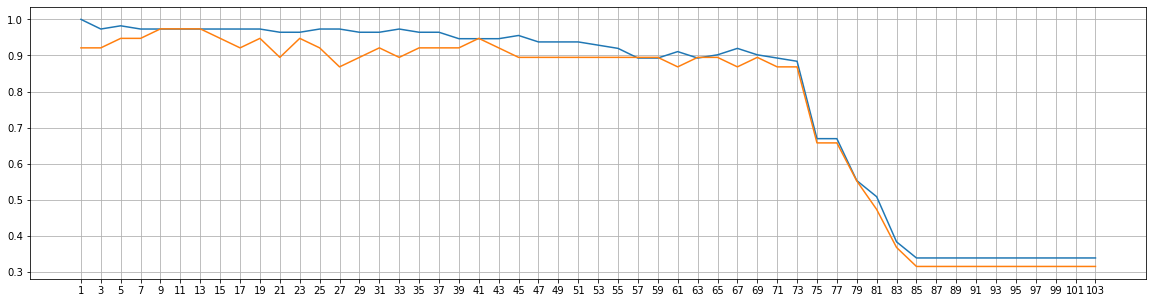

In [53]:
#시각화

plt.figure(figsize=(20,5))
plt.plot(range(1,105,2),train_list)
plt.plot(range(1,105,2),test_list)
plt.xticks(range(1,105,2))
plt.grid()
plt.show()